<h1 style="color:#191970; font-size:38px">MIMO-Gradient-Descent</h1>

<h1 style="color:#006400">Tools</h1>

<h1 style="color:#FF5733 ; font-size:15px"> CommPy</h1> is an open source toolkit implementing digital communications algorithms in Python using NumPy and SciPy.

In [1]:
pip install scikit-commpy

Note: you may need to restart the kernel to use updated packages.


<h1 style="color:#006400">Libraries</h1>

In [2]:
from statistics import mean
import numpy as np
from numpy.random import *
from numpy import *
from numpy.linalg import inv
from commpy.utilities import *
from commpy.modulation import QAMModem
from commpy.channels import *
from commpy.links import *
from math import *
import matplotlib.pyplot as plt
import time 

<h1 style="color:#006400">Functions</h1>

### 1. High Power Amplifier Output  

In [3]:
def hpa_sspa_modif_rapp(vin,Vsat,p,q,G,A,B):
    A=-345
    a0=abs(vin)
    theta=np.angle(vin)
    Am=(G*a0)/((1+(G*a0/Vsat)**(2*p))**(1/(2*p)))
    Bm=(A*(a0**q))/((1+(a0/B)**(q)))
    vout=Am*np.exp(1j*(theta+Bm))
    return(vout)
    

### 2. Non Linear Distortion Parameters  

In [4]:
def find_K0_sigma2_d(vin,vout):
    K0 = np.mean(vout*np.conj(vin))/np.mean(np.absolute(vin)**2)
    sigma2_d = np.var(vout - K0*vin)
    return(K0,sigma2_d)

<h1 style="color:#006400">Basic PA Non linear Distortion Model </h1>

In [5]:
IBO=1
p=1.1
q=4
Vsat=1.9
G=16
A=-345
B=0.17
val_IBO_m1dB=((1/np.sqrt(10**-0.1))**(2*p)-1)**(1/(2*p))*Vsat/(G)
coeff_IBO_m1dB=val_IBO_m1dB*np.sqrt(10**(-IBO/10))
s=np.random.randn(1,1000000)
vin1 = np.sqrt(1/2)*(s+1j*s)
vin01 = coeff_IBO_m1dB*vin1
a0=np.absolute(vin01)
a02=a0**2  
theta=np.angle(vin01)
Am=(G*a0)/((1+(G*a0/Vsat)**(2*p))**(1/(2*p)))
Bm=(A*(a0**q))/((1+(a0/B)**(q)))
Sm=Am*np.exp(1j*(Bm))
vout1=Am*np.exp(1j*(theta+Bm))
K0 = np.mean(vout1*np.conj(vin01))/np.mean(np.absolute(vin01)**2)
sigma2_d = np.var(vout1 - K0*vin01) 
print(K0)
print(sigma2_d)

(12.804740580924829-0.4429645694875307j)
0.01350558194544916


<h1 style="color:#006400">16-QAM-Modulation/Demodulation</h1>

In [6]:
Mr=10
Mt=100
M=16
SNRdb=600
N_bits=Mr*np.log2(M)
MSE=np.zeros((Mt,50),dtype=ndarray)
x_gd_amp0=np.zeros((Mt,1))
y_gd_r0=np.zeros([Mt,100])
PAPR_GD=np.zeros((Mt,1))
MUIgdi= np.zeros((Mt,1))
SERgdi=np.zeros((Mt,1))
BERgdi=np.zeros((Mt,1))
GD_Execution_time=0
for monte in range(100):
    bits = np.random.randint(2, size=int(N_bits))
    QAM16 = QAMModem(16)
    z=QAM16.modulate(bits)
    H=(1/np.sqrt(2*Mt))*(np.random.randn(Mr,Mt)+1j*np.random.randn(Mr,Mt))
    zf=np.transpose(np.conj(H)).dot(inv(H.dot(np.transpose(np.conj(H)))))
    x_zf=zf.dot(z)
    recieve=H.dot(x_zf)
    A=QAM16.demodulate(recieve, demod_type='hard', noise_var=0)
    print(bits)
    print(A)
    print(z.T)
    

[1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0
 1 0 1]
[1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0
 1 0 1]
[ 3.+3.j -3.-3.j -1.+1.j  3.-1.j  1.+1.j -1.+3.j  1.-1.j -3.+3.j -1.+1.j
 -1.-1.j]
[0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1
 0 1 0]
[0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1
 0 1 0]
[-3.-1.j  3.-3.j -3.+3.j  1.-1.j  3.-1.j  1.-1.j  1.-1.j -1.+1.j -1.-1.j
  1.+1.j]
[0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 0 1]
[0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 0 1]
[-1.-1.j  1.-1.j  1.-3.j -1.-1.j -1.-3.j  3.-1.j -1.+3.j -1.-1.j -1.-1.j
  3.-1.j]
[0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 0]
[0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 0]
[-3.+3.j -1.+1.j  1.+1.j -1.+1.j  1.+1.j  1.+1.j -3.+3.j  1.+1.j -3.-3.j
  3.-3.j]
[0 0

 1 0 0]
[-3.-3.j -1.+3.j  1.+3.j -3.+1.j -3.+1.j  1.-3.j  3.+1.j  3.-3.j -3.-1.j
 -1.-3.j]
[1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 1 1]
[1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 1 1]
[ 3.+3.j  1.-1.j  3.-3.j  1.-1.j -1.+1.j  3.+1.j -1.-1.j  3.-3.j -3.+3.j
  3.+3.j]
[1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1
 0 1 1]
[1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1
 0 1 1]
[ 3.-1.j  1.-3.j  1.+3.j  1.+1.j -1.-1.j -1.-3.j  1.+3.j  1.+1.j -1.-3.j
  1.+3.j]
[1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0
 0 0 0]
[1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0
 0 0 0]
[ 1.+1.j  1.-3.j  1.-1.j  1.+1.j -1.+3.j -3.-3.j  1.-1.j -1.+3.j -1.+3.j
 -3.-3.j]
[0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 1]
[0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 1

<h1 style="color:#006400">Gradient Descent Algorithm</h1>

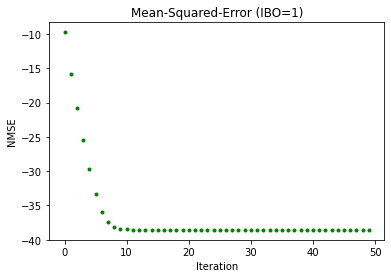

In [7]:
    Niter=50
    mu1=0.0022
    lamda=0.00071
    mu2=1
    eps=1e-2
    x_gd=np.zeros([Mt,1])
    gdx1=np.zeros([Mt,Niter])
    d=np.zeros([Mt,1])
    start_time=time.time()
    ## CDm algo
    for i in range(Niter):
        Z = np.reshape(z, (1, 10)).T
        gdx1=2*np.conj(K0*np.transpose(H)).dot(K0*H.dot(x_gd)+H.dot(d)-Z)
        x_gd=x_gd-mu1*gdx1
        ## HPA 
        val_IBO_m1dB=((1/nyp.sqrt(10**-0.1))**(2*p)-1)**(1/(2*p))*Vsat/(G)
        coeff_IBO_m1dB=val_IBO_m1dB*np.sqrt((1/np.var(x_gd)))*np.sqrt(10**(-IBO/10))
        vin2=coeff_IBO_m1dB*x_gd
        vout2=hpa_sspa_modif_rapp(vin2,Vsat,p,q,G,A,B)
        y_gd =np.array( vout2/(coeff_IBO_m1dB))
        K0,sigma2_d=find_K0_sigma2_d (vin2,vout2)
        d =vout2-K0*vin2
        MSE=np.mean(np.abs(H.dot(y_gd)-Z)**2)/(np.mean(np.abs(Z)**2))
        MMSE=np.mean( MSE)
        NMSE=10*np.log10(MMSE)
        plt.figure
        plt.title('Mean-Squared-Error (IBO=1)')
        plt.xlabel('Iteration')
        plt.ylabel('NMSE')
        plt.plot(i,NMSE,color='green', marker='.', linestyle='dashed')
    MSE=MSE

  

### GD  Execution Time

In [8]:
GD_Execution_time=time.time()-start_time
print(GD_Execution_time/Niter)

0.05817322254180908


<h1 style="color:#006400">Hight Power Amplifier </h1>

In [10]:
    PAPR_GD[monte]=np.max(np.abs(x_gd)**2)/np.mean(np.abs(x_gd)**2)
    coeff_IBO_m1dB=val_IBO_m1dB*np.sqrt((1/np.var(x_gd)))*np.sqrt(10**(-IBO/10))
    vin3=coeff_IBO_m1dB*x_gd
    vout3=hpa_sspa_modif_rapp(vin3,Vsat,p,q,G,A,B)
    x_gd_amp = vout3
    x_gd_amp0 =x_gd_amp
            

<h1 style="color:#006400">Channel </h1>

In [11]:
    y_gd=H.dot(x_gd_amp)

<h1 style="color:#006400">Gaussian Noise</h1>

In [12]:
    SNRlin=10.**(SNRdb/10) 
    sigmas2=np.var(Z)
    sigma2=(sigmas2/(2*SNRlin))
    sigmas2gd=np.var(x_gd_amp)
    sigma2gd=(sigmas2gd/(2*SNRlin))
    wgd = np.sqrt(sigma2gd)*(np.random.randn(Mr,1)+1j*np.random.randn(Mr,1))
    y_gd_r = y_gd + wgd
    y_gd_r = y_gd_r/coeff_IBO_m1dB
    y_gd_r0=y_gd_r

<h1 style="color:#006400">Simulation Results</h1>

In [13]:
    MUIgdi[monte]=np.mean(np.abs(y_gd_r-Z)**2)/np.mean(np.abs(Z)**2)   
    BERgdi[monte]=np.sum(A!=bits)/(Mr*np.log2(M))
    SERgdi[monte]=np.log2(M)*BERgdi[monte]  

### 1. Peak-to-Average Power Ratio

In [14]:
print(np.mean(PAPR_GD)) 

0.05607922062233261


### 2. Multi-User Interference

In [15]:
MUIgd = 10*np.log10(mean(MUIgdi))
print(MUIgd)

-64.81010377915484


### 3. Squared Bit Error Rate

In [16]:
SERgd = mean(SERgdi)
print(SERgd)

0.0


### 4. Bit Error Rate

In [17]:
BERgd = mean(BERgdi)
print(BERgd)

0.0


In [18]:
TP=np.var(x_gd_amp0)
print(TP)

0.6851229298702868
